# Data Importing

In [110]:
path = 'MutR_10ScaledF_cata_NumCata.xlsx'

In [ ]:
# ls gdrive/MyDrive/PMM2/Data/

# Import Libraries

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout

# Put the whole data (imbalaanced- known_Unknown)data in Panda DataFrame

In [112]:
df_Unbalanced = pd.read_excel(path)

In [113]:
df_Unbalanced.shape

(1454, 13)

In [114]:
df_Unbalanced.columns

Index(['Mut_aranged', 'RG', 'SASA', 'RMSD', 'Tensor of inertia',
       'Free energy of stability', 'Contact', 'Total H bonds', 'Helix', 'Beta',
       'Coil', 'HGMD_Clinvar_1_clinvar_call_1_alphaMi', 'location'],
      dtype='object')

# Put the SMOTE (On KNOWN) data in DataFrame

In [115]:
df_balanced_Smore_X = pd.read_excel('Balanced_SMOTE_X_Fetures.xlsx')

In [116]:
df_balanced_Smore_X

RG      SASA      RMSD  Tensor of inertia  \
0    2.161878  1.074139  0.322571           2.936939   
1   -0.605843 -0.018621  0.565498          -0.586374   
2   -0.663143 -0.188479 -0.907112          -2.566238   
3    0.844599 -0.198932 -0.999696          -1.413736   
4    1.796704 -0.612364  0.226185           0.102863   
..        ...       ...       ...                ...   
286  0.306674 -1.370077 -0.427476          -0.804839   
287 -0.763586  0.630790 -0.202196          -0.155246   
288  0.984945  1.036312 -0.553042           0.688363   
289  0.780478  0.798426 -0.482258           0.632629   
290 -0.837201 -1.029205  0.041831           0.110249   

     Free energy of stability   Contact  Total H bonds     Helix      Beta  \
0                   -0.324470  0.729350      -2.834414 -0.332571 -0.414533   
1                   -0.201347 -0.526839       0.133637 -1.698605 -0.414533   
2                   -0.055687 -1.029315       0.727247 -1.361312  0.772914   
3                   -0.437461 -1.280553      -0.064233  0.350445 -0.414533   
4                   -0.414795  0.980588       1.518728  1.041894  0.772914   
..                        ...       ...            ...       ...       ...   
286                  0.087563 -1.400799      -1.259916 -0.956968 -0.311347   
287                 -0.644872  0.630671      -0.021797 -0.032110  0.734048   
288                  0.186069 -1.531790       0.520903 -1.015588 -0.414533   
289                  0.135749 -1.190945       0.439896 -1.092807 -0.280286   
290                 -0.298959  1.416223      -0.227008 -1.546803  0.772914   

         Coil  
0    0.508718  
1    1.742055  
2    0.818944  
3   -0.104167  
4   -1.329937  
..        ...  
286  1.021339  
287 -0.353964  
288  1.129170  
289  1.129170  
290  0.992284  

[291 rows x 10 columns]

In [117]:
df_balanced_Smore_Y = pd.read_excel('Balanced_SMOTE_Y_Labels.xlsx')

In [ ]:
# df_balanced_Smore_Y

# Split the SMOTE DATA For DNN MOdel

In [146]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_balanced_Smore_X, df_balanced_Smore_Y, test_size=0.2, random_state=42)


In [140]:
# # Print unique classes in y_train to ensure all are accounted for
# unique_classes_in_y_train = np.unique(y_train)
# print("Unique classes in y_train:", unique_classes_in_y_train)

# # Your previously defined classes array
# print("Classes array passed to compute_class_weight:", classes)

# SCALE The Feature

In [147]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [148]:
y_train

location
210         3
219         3
216         3
73          1
25          0
..        ...
188         0
71          1
106         1
270         3
102         0

[232 rows x 1 columns]

# Train The MOdel on SMOTE splitted train data

In [151]:
# # Convert classes from 1, 2, 3 to 0, 1, 2
y_train.loc[y_train['location'] == 3, 'location'] = 2
y_test.loc[y_test['location'] == 3, 'location'] = 2

# Display the updated DataFrame to confirm changes
# print(y_train)


In [152]:
y_train

location
210         2
219         2
216         2
73          1
25          0
..        ...
188         0
71          1
106         1
270         2
102         0

[232 rows x 1 columns]

In [153]:

# # One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

In [154]:
y_train_encoded

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0

In [155]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(120, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(72, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes

In [156]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [157]:
# Set up early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [158]:
# Train the model
#rf_model.fit(X_train_scaled, y_train)
# Train the model with class weights
history = model.fit(X_train_scaled, y_train_encoded, epochs=900, batch_size=10, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/900
19/19 [==============================] - 4s 24ms/step - loss: 1.2602 - accuracy: 0.2973 - val_loss: 1.0360 - val_accuracy: 0.4681
Epoch 2/900
19/19 [==============================] - 0s 9ms/step - loss: 1.1239 - accuracy: 0.4162 - val_loss: 0.9894 - val_accuracy: 0.5957
Epoch 3/900
19/19 [==============================] - 0s 8ms/step - loss: 1.0787 - accuracy: 0.4324 - val_loss: 0.9567 - val_accuracy: 0.6383
Epoch 4/900
19/19 [==============================] - 0s 7ms/step - loss: 1.0209 - accuracy: 0.5189 - val_loss: 0.9364 - val_accuracy: 0.6383
Epoch 5/900
19/19 [==============================] - 0s 6ms/step - loss: 1.0212 - accuracy: 0.4703 - val_loss: 0.9062 - val_accuracy: 0.6809
Epoch 6/900
19/19 [==============================] - 0s 7ms/step - loss: 0.9877 - accuracy: 0.5027 - val_loss: 0.8759 - val_accuracy: 0.6809
Epoch 7/900
19/19 [==============================] - 0s 6ms/step - loss: 0.9457 - accuracy: 0.5297 - val_loss: 0.8485 - val_accuracy: 0.7234
Epoch 8/900


# Test The train model on SMOTE tested DAta

In [159]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


2/2 [==============================] - 0s 9ms/step - loss: 0.4720 - accuracy: 0.7627
Test Loss: 0.4719729721546173, Test Accuracy: 0.7627118825912476


# PLoting now Confusion Matrix

In [160]:
# Assuming X_test is your features from the test set
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

2/2 [==============================] - 0s 6ms/step


In [161]:
y_pred

array([1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0,
       0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0])

In [162]:
y_true = np.argmax(y_test_encoded, axis=1)  # Make sure y_test_encoded is the one-hot encoded true labels


In [163]:
y_true

array([1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0,
       0, 0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0])

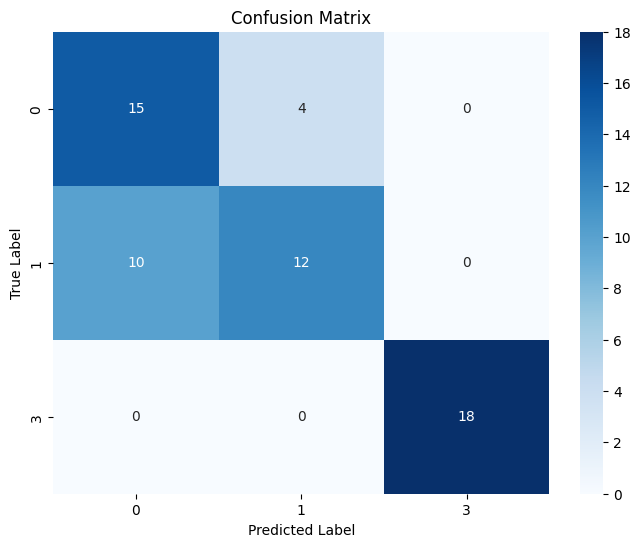

In [165]:
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 3], yticklabels=[0, 1, 3])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plotting ROC on SMOTE tested Data predicted By Semi-Supervised Model

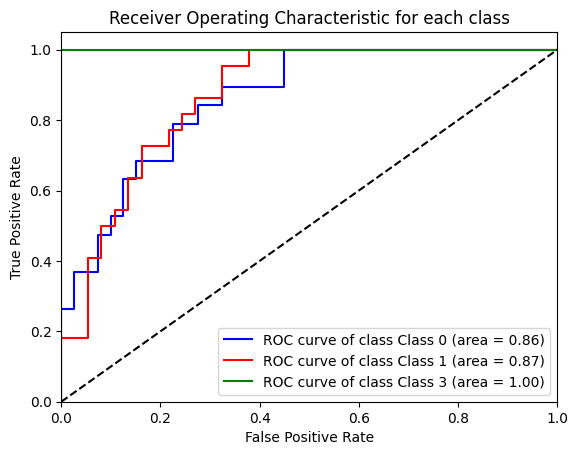

In [167]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for all classes
y_test_binarized = label_binarize(y_true, classes=[0, 1, 2])

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
colors = ['blue', 'red', 'green']
name = ['Class 0', 'Class 1', 'Class 3']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, label='ROC curve of class {0} (area = {1:0.2f})'.format(name[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each class')
plt.legend(loc="lower right")
plt.show()




In [170]:
# import joblib
# joblib.dump(model,'/content/gdrive/My Drive/Naeyma/PMM2/10_Feautre_Balanced_Data/MOdel/DNN/DNN_model_May10th.h5')

['/content/gdrive/My Drive/Naeyma/PMM2/10_Feautre_Balanced_Data/MOdel/DNN/DNN_history_May10th.h5']

#Find how many of the 1297 UNKNOWN data are predicted as B, DM or ambiguous by the SemiSupervised Model

In [197]:
df_unknown = df_Unbalanced[df_Unbalanced['HGMD_Clinvar_1_clinvar_call_1_alphaMi'] == 'Unknown']

In [198]:
df_unknown

Mut_aranged        RG      SASA      RMSD  Tensor of inertia  \
0            M1I -0.480529 -1.342104 -0.602711          -0.482871   
42           L8F -0.116003  1.876259 -0.945640          -0.996720   
43           L8H  0.129953 -1.138204 -0.424778           0.917223   
45           L8P -0.833789  0.008898 -0.869230          -1.265023   
46           L8R  1.990215  0.265301  2.010230           2.000935   
...          ...       ...       ...       ...                ...   
1449       S246C -0.158246  0.108398  0.449801          -0.447244   
1450       S246F  0.932724  1.909330 -0.440022           2.617279   
1451       S246P -1.160678  0.228734 -0.581167          -0.619480   
1452       S246T -0.700060 -0.349027 -0.185248          -1.740483   
1453       S246Y -0.195320  1.691117 -0.904006          -1.396261   

      Free energy of stability   Contact  Total H bonds     Helix      Beta  \
0                    -0.360041  1.231826       0.529377 -0.332571 -0.414533   
42                   -0.070318 -0.024364      -0.262103 -1.361312 -0.414533   
43                   -0.326850  0.729350       2.508078 -1.015588 -0.993775   
45                   -0.443088  0.226874      -0.855713  2.407927 -2.181223   
46                    0.283921 -0.275601      -2.240804  1.379186 -0.993775   
...                        ...       ...            ...       ...       ...   
1449                 -0.163723  0.226874       1.716598 -1.015588 -0.414533   
1450                 -0.260442  0.226874      -0.262103  0.013153 -0.414533   
1451                 -0.137333  0.729350      -0.064233  0.013153 -0.414533   
1452                 -0.040746 -0.526839       1.122987  0.350445  0.772914   
1453                 -0.132953 -0.778077      -0.459973  0.350445  0.772914   

          Coil HGMD_Clinvar_1_clinvar_call_1_alphaMi  location  
0     0.508718                               Unknown         2  
42    1.431829                               Unknown         2  
43    1.431829                               Unknown         2  
45   -1.027277                               Unknown         2  
46   -0.717052                               Unknown         2  
...        ...                                   ...       ...  
1449  1.129170                               Unknown         2  
1450  0.206059                               Unknown         2  
1451  0.206059                               Unknown         2  
1452 -0.717052                               Unknown         2  
1453 -0.717052                               Unknown         2  

[1297 rows x 13 columns]

In [199]:
X_unknown = df_unknown.drop(['Mut_aranged', 'HGMD_Clinvar_1_clinvar_call_1_alphaMi', 'location', ], axis=1)
y_unknown= df_unknown['location']

In [200]:
# scaler = StandardScaler()
X_unknown_scaled = scaler.fit_transform(X_unknown)
pred_unknown  = model.predict(X_unknown_scaled)

41/41 [==============================] - 0s 1ms/step


In [201]:
pred_unknown

array([[4.1340661e-01, 5.7826704e-01, 8.3264168e-03],
       [4.2466030e-01, 2.5893492e-01, 3.1640476e-01],
       [8.3589190e-01, 1.6409677e-01, 1.1216997e-05],
       ...,
       [2.6531902e-01, 6.0091674e-01, 1.3376410e-01],
       [7.7678192e-01, 2.2320884e-01, 9.3044409e-06],
       [7.3193771e-01, 2.6582476e-01, 2.2375043e-03]], dtype=float32)

***# Convert probabilities (pred_unknown) to class labels (predicted_labels)***

In [202]:
predicted_labels = np.argmax(pred_unknown, axis=1)

In [203]:
predicted_labels

array([1, 0, 0, ..., 1, 0, 0])

In [204]:
unique_elements = np.unique(predicted_labels)
unique_elements

array([0, 1, 2])

In [205]:
num_categories = len(unique_elements)

In [206]:
print("Unique categories:", unique_elements)
print("Number of unique categories:", num_categories)

Unique categories: [0 1 2]
Number of unique categories: 3


In [207]:
unique_elements, counts = np.unique(predicted_labels, return_counts=True)

In [208]:
for category, count in zip(unique_elements, counts):
    print(f"Category {category} appears {count} times.")

Category 0 appears 765 times.
Category 1 appears 446 times.
Category 2 appears 86 times.


# Make a dataframe where we added a SSM(semi supervised Model) predicted label with our original UNKNOWN existing DataFrame and SAVE them

In [209]:
predicted_labels

array([1, 0, 0, ..., 1, 0, 0])

In [210]:
# df_SS_Unkown = pd.DataFrame(predicted_labels, columns=['PredictedCategory_DNN'])

In [211]:
df_unknown['predicted_DNN'] = predicted_labels

<ipython-input-211-8ef422b1f6c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unknown['predicted_DNN'] = predicted_labels


In [212]:
df_unknown.loc[df_unknown['predicted_DNN'] == 2, 'predicted_DNN'] = 3

In [213]:
df_unknown.to_excel('/content/gdrive/My Drive/Naeyma/PMM2/10_Feautre_Balanced_Data/Data/UNKNOWN/Unknown_PreictedByDNN.xlsx')

In [214]:
df_unknown

Mut_aranged        RG      SASA      RMSD  Tensor of inertia  \
0            M1I -0.480529 -1.342104 -0.602711          -0.482871   
42           L8F -0.116003  1.876259 -0.945640          -0.996720   
43           L8H  0.129953 -1.138204 -0.424778           0.917223   
45           L8P -0.833789  0.008898 -0.869230          -1.265023   
46           L8R  1.990215  0.265301  2.010230           2.000935   
...          ...       ...       ...       ...                ...   
1449       S246C -0.158246  0.108398  0.449801          -0.447244   
1450       S246F  0.932724  1.909330 -0.440022           2.617279   
1451       S246P -1.160678  0.228734 -0.581167          -0.619480   
1452       S246T -0.700060 -0.349027 -0.185248          -1.740483   
1453       S246Y -0.195320  1.691117 -0.904006          -1.396261   

      Free energy of stability   Contact  Total H bonds     Helix      Beta  \
0                    -0.360041  1.231826       0.529377 -0.332571 -0.414533   
42                   -0.070318 -0.024364      -0.262103 -1.361312 -0.414533   
43                   -0.326850  0.729350       2.508078 -1.015588 -0.993775   
45                   -0.443088  0.226874      -0.855713  2.407927 -2.181223   
46                    0.283921 -0.275601      -2.240804  1.379186 -0.993775   
...                        ...       ...            ...       ...       ...   
1449                 -0.163723  0.226874       1.716598 -1.015588 -0.414533   
1450                 -0.260442  0.226874      -0.262103  0.013153 -0.414533   
1451                 -0.137333  0.729350      -0.064233  0.013153 -0.414533   
1452                 -0.040746 -0.526839       1.122987  0.350445  0.772914   
1453                 -0.132953 -0.778077      -0.459973  0.350445  0.772914   

          Coil HGMD_Clinvar_1_clinvar_call_1_alphaMi  location  predicted_DNN  
0     0.508718                               Unknown         2              1  
42    1.431829                               Unknown         2              0  
43    1.431829                               Unknown         2              0  
45   -1.027277                               Unknown         2              1  
46   -0.717052                               Unknown         2              1  
...        ...                                   ...       ...            ...  
1449  1.129170                               Unknown         2              0  
1450  0.206059                               Unknown         2              0  
1451  0.206059                               Unknown         2              1  
1452 -0.717052                               Unknown         2              0  
1453 -0.717052                               Unknown         2              0  

[1297 rows x 14 columns]

# Plot The Mutated Residue which are Unknown but now Predicted by SS

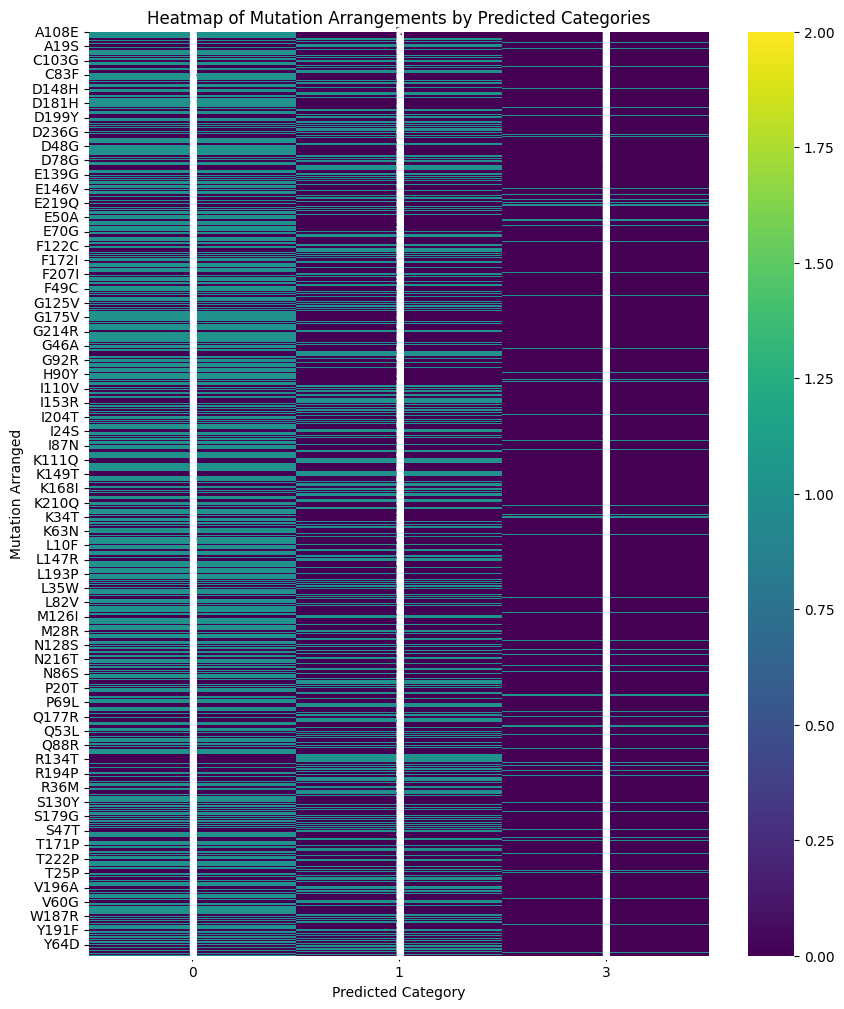

In [215]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for heatmap
heatmap_data = pd.crosstab(df_unknown['Mut_aranged'], df_unknown['predicted_DNN'])

# Create a heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap of Mutation Arrangements by Predicted Categories')
plt.xlabel('Predicted Category')
plt.ylabel('Mutation Arranged')
plt.show()


In [ ]:
# Category 0 appears 765 times.
# Category 1 appears 446 times.
# Category 2 appears 86 times.

In [216]:
import matplotlib.pyplot as plt

# Data preparation
categories = ['Damaging', 'Benign', 'Ambiguous']
counts = [446, 765, 86]  # Corresponding counts for each category


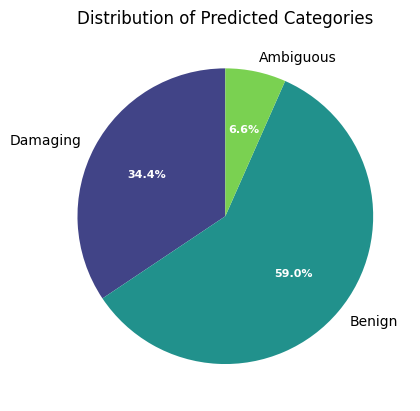

In [217]:
# Colors
colors = plt.cm.viridis([0.2, 0.5, 0.8])

# Plotting the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors)

# Beautify the plot
ax.set_title('Distribution of Predicted Categories')
plt.setp(autotexts, size=8, weight="bold", color="white")

# Display the plot
plt.show()

In [220]:
tpr

{0: array([0.        , 0.05263158, 0.26315789, 0.26315789, 0.36842105,
        0.36842105, 0.47368421, 0.47368421, 0.52631579, 0.52631579,
        0.63157895, 0.63157895, 0.68421053, 0.68421053, 0.78947368,
        0.78947368, 0.84210526, 0.84210526, 0.89473684, 0.89473684,
        1.        , 1.        ]),
 1: array([0.        , 0.04545455, 0.18181818, 0.18181818, 0.40909091,
        0.40909091, 0.5       , 0.5       , 0.54545455, 0.54545455,
        0.63636364, 0.63636364, 0.72727273, 0.72727273, 0.77272727,
        0.77272727, 0.81818182, 0.81818182, 0.86363636, 0.86363636,
        0.95454545, 0.95454545, 1.        , 1.        ]),
 2: array([0.        , 0.05555556, 1.        , 1.        ])}